<a href="https://colab.research.google.com/github/pravin-raut/DS-ML/blob/Master/03_Visualization_Interpolation_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import sklearn
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
bos_house=load_boston()


In [8]:
ColNames=bos_house.feature_names

In [9]:
data=pd.DataFrame(bos_house.data)

In [10]:
data.columns=ColNames

In [11]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
import seaborn as sns

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


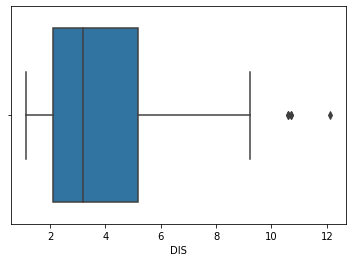

In [13]:
sns.boxplot(data['DIS'])

In [19]:
data[data['DIS']>10]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
351,0.07950,60.0,1.69,0.0,0.411,6.579,35.9,10.7103,4.0,411.0,18.3,370.78,5.49
352,0.07244,60.0,1.69,0.0,0.411,5.884,18.5,10.7103,4.0,411.0,18.3,392.33,7.79
353,0.01709,90.0,2.02,0.0,0.410,6.728,36.1,12.1265,5.0,187.0,17.0,384.46,4.50
354,0.04301,80.0,1.91,0.0,0.413,5.663,21.9,10.5857,4.0,334.0,22.0,382.80,8.05
355,0.10659,80.0,1.91,0.0,0.413,5.936,19.5,10.5857,4.0,334.0,22.0,376.04,5.57


In [22]:
np.where(data['DIS']>10)

(array([351, 352, 353, 354, 355]),)

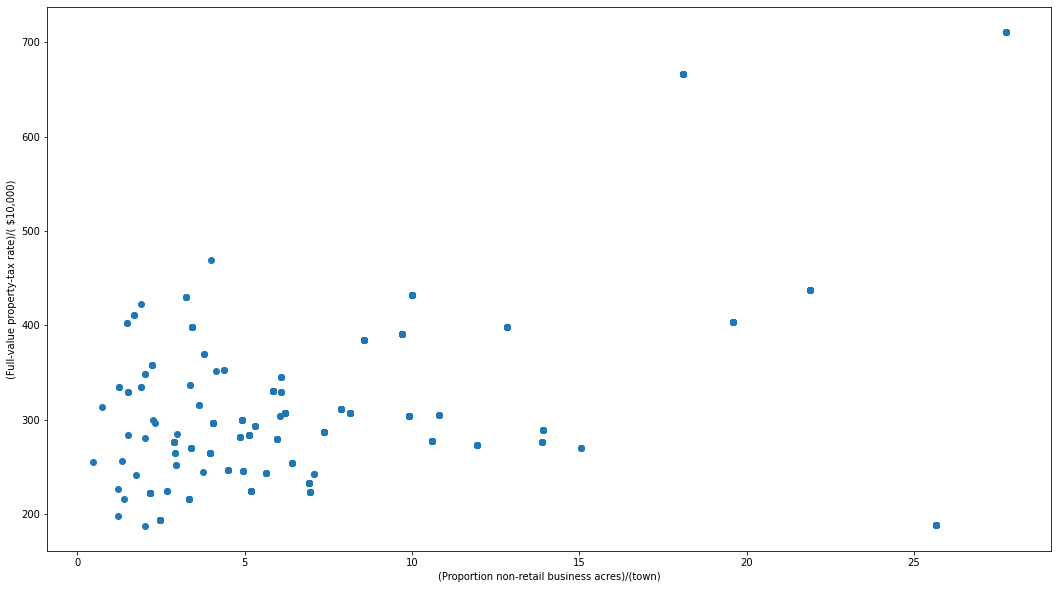

In [28]:
# Scatter plot
fig,ax =plt.subplots(figsize=(18,10))
ax.scatter(data['INDUS'],data['TAX'])
# x-axis label
ax.set_xlabel('(Proportion non-retail business acres)/(town)')
# y-axis label
ax.set_ylabel('(Full-value property-tax rate)/( $10,000)')
plt.show()


In [34]:
data[(data['INDUS']>20) & (data['TAX']>600)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
488,0.15086,0.0,27.74,0.0,0.609,5.454,92.7,1.8209,4.0,711.0,20.1,395.09,18.06
489,0.18337,0.0,27.74,0.0,0.609,5.414,98.3,1.7554,4.0,711.0,20.1,344.05,23.97
490,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,4.0,711.0,20.1,318.43,29.68
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
492,0.11132,0.0,27.74,0.0,0.609,5.983,83.5,2.1099,4.0,711.0,20.1,396.90,13.35


## **IQR (Inter Quartile Range)**

In [37]:
# IQR
Q1 = np.percentile(data['DIS'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(data['DIS'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 


In [39]:
IQR

3.0646000000000004

In [40]:
data.shape

(506, 13)

In [42]:
upper = np.where(data['DIS'] >= (Q3+1.5*IQR))

In [44]:
lower = np.where(data['DIS'] <= (Q1-1.5*IQR))

In [46]:
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)


In [48]:
data.shape

(501, 13)

In [49]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [55]:
colname=data.columns

In [52]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaled_dataset=scaler.fit_transform(data)

scaled_dataset

array([[-0.4221648 ,  0.32239913, -1.30704424, ..., -1.45531901,
         0.44172158, -1.08363554],
       [-0.41973215, -0.47677497, -0.60952577, ..., -0.29843461,
         0.44172158, -0.5009655 ],
       [-0.41973447, -0.47677497, -0.60952577, ..., -0.29843461,
         0.39730009, -1.21669721],
       ...,
       [-0.41585544, -0.47677497,  0.10264644, ...,  1.18237742,
         0.44172158, -0.9911927 ],
       [-0.41019626, -0.47677497,  0.10264644, ...,  1.18237742,
         0.404067  , -0.87353817],
       [-0.41740265, -0.47677497,  0.10264644, ...,  1.18237742,
         0.44172158, -0.67744729]])

In [53]:
Newdata=pd.DataFrame(scaled_dataset)

In [57]:
Newdata.columns=colname
Newdata.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.422165,0.322399,-1.307044,-0.274057,-0.156980,0.410617,-0.135909,0.184288,-0.985955,-0.669009,-1.455319,0.441722,-1.083636
1,-0.419732,-0.476775,-0.609526,-0.274057,-0.754647,0.191888,0.354595,0.625560,-0.871346,-0.988814,-0.298435,0.441722,-0.500966
2,-0.419734,-0.476775,-0.609526,-0.274057,-0.754647,1.277011,-0.282702,0.625560,-0.871346,-0.988814,-0.298435,0.397300,-1.216697
3,-0.419146,-0.476775,-1.326094,-0.274057,-0.849928,1.011411,-0.830491,1.176510,-0.756737,-1.107260,0.118044,0.416946,-1.369368
4,-0.414895,-0.476775,-1.326094,-0.274057,-0.849928,1.223039,-0.529744,1.176510,-0.756737,-1.107260,0.118044,0.441722,-1.034613
